# Prediction of which passengers survived the shipwreck of the Titanic.

## 1. Import Necessary Libraries

In [4]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from matplotlib import rcParams

import warnings
warnings.filterwarnings('ignore')
                        
%matplotlib inline
rcParams['figure.figsize'] = 35, 10
matplotlib.rcParams.update({'font.size': 14})

## 2. Read in and Explore the Data 

In [5]:
df_train = pd.read_csv('./train.csv')
df_test = pd.read_csv('./test.csv')

In [6]:
df_train.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
837,838,0,3,"Sirota, Mr. Maurice",male,NaN,0,0,392092,8.0500,NaN,S
308,309,0,2,"Abelson, Mr. Samuel",male,30.0,1,0,P/PP 3381,24.0000,NaN,C
575,576,0,3,"Patchett, Mr. George",male,19.0,0,0,358585,14.5000,NaN,S
532,533,0,3,"Elias, Mr. Joseph Jr",male,17.0,1,1,2690,7.2292,NaN,C
875,876,1,3,"Najib, Miss. Adele Kiamie ""Jane""",female,15.0,0,0,2667,7.2250,NaN,C


In [7]:
df_test.sample(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
104,996,3,"Thomas, Mrs. Alexander (Thamine Thelma"")""",female,16.0,1,1,2625,8.5167,NaN,C
159,1051,3,"Peacock, Mrs. Benjamin (Edith Nile)",female,26.0,0,2,SOTON/O.Q. 3101315,13.7750,NaN,S
299,1191,3,"Johansson, Mr. Nils",male,29.0,0,0,347467,7.8542,NaN,S
192,1084,3,"van Billiard, Master. Walter John",male,11.5,1,1,A/5. 851,14.5000,NaN,S
302,1194,2,"Phillips, Mr. Escott Robert",male,43.0,0,1,S.O./P.P. 2,21.0000,NaN,S


#### Description of columns:

 1.   Survived  -    Выжившие 
 2.   Pclass  -      Класс кают 
 3.   Name  -        Имя
 4.   Sex  -         Пол
 5.   Age  -         Возраст
 6.   SibSp  -       Число путешествующих вместе
 7.   Parch  -       Кол-во родственников 
 8.   Ticket  -      Билет
 9.   Fare  -        Цена билета
 10.  Cabin  -       Каюта 
 11.  Embarked  -    В каком городе сели

## 3. Data Analysis

In [8]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [10]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [11]:
feature_names = df_train.columns.tolist() 
for column in feature_names: 
    print(column) 
    print(df_train[column].value_counts(dropna=False)) 

PassengerId
1      1
599    1
588    1
589    1
590    1
      ..
301    1
302    1
303    1
304    1
891    1
Name: PassengerId, Length: 891, dtype: int64
Survived
0    549
1    342
Name: Survived, dtype: int64
Pclass
3    491
1    216
2    184
Name: Pclass, dtype: int64
Name
Braund, Mr. Owen Harris                     1
Boulos, Mr. Hanna                           1
Frolicher-Stehli, Mr. Maxmillian            1
Gilinski, Mr. Eliezer                       1
Murdlin, Mr. Joseph                         1
                                           ..
Kelly, Miss. Anna Katherine "Annie Kate"    1
McCoy, Mr. Bernard                          1
Johnson, Mr. William Cahoone Jr             1
Keane, Miss. Nora A                         1
Dooley, Mr. Patrick                         1
Name: Name, Length: 891, dtype: int64
Sex
male      577
female    314
Name: Sex, dtype: int64
Age
NaN      177
24.00     30
22.00     27
18.00     26
28.00     25
        ... 
36.50      1
55.50      1
0.92       1
2

### Result:

- Numerical Features: Age (Continuous), Fare (Continuous), SibSp (Discrete), Parch (Discrete)
- Categorical Features: Survived, Sex, Embarked, Pclass
- Alphanumeric Features: Ticket, Cabin
- There are a total of 891 passengers in our training set and 418 passengers in our testing set.
- The Age feature is missing approximately 19.8% of its values. I'm guessing that the Age feature is pretty important to survival, so we should probably attempt to fill these gaps.
- The Cabin feature is missing approximately 77.1% of its values. Since so much of the feature is missing, it would be hard to fill in the missing values. We'll probably drop these values from our dataset.




## 4. Data Visualization

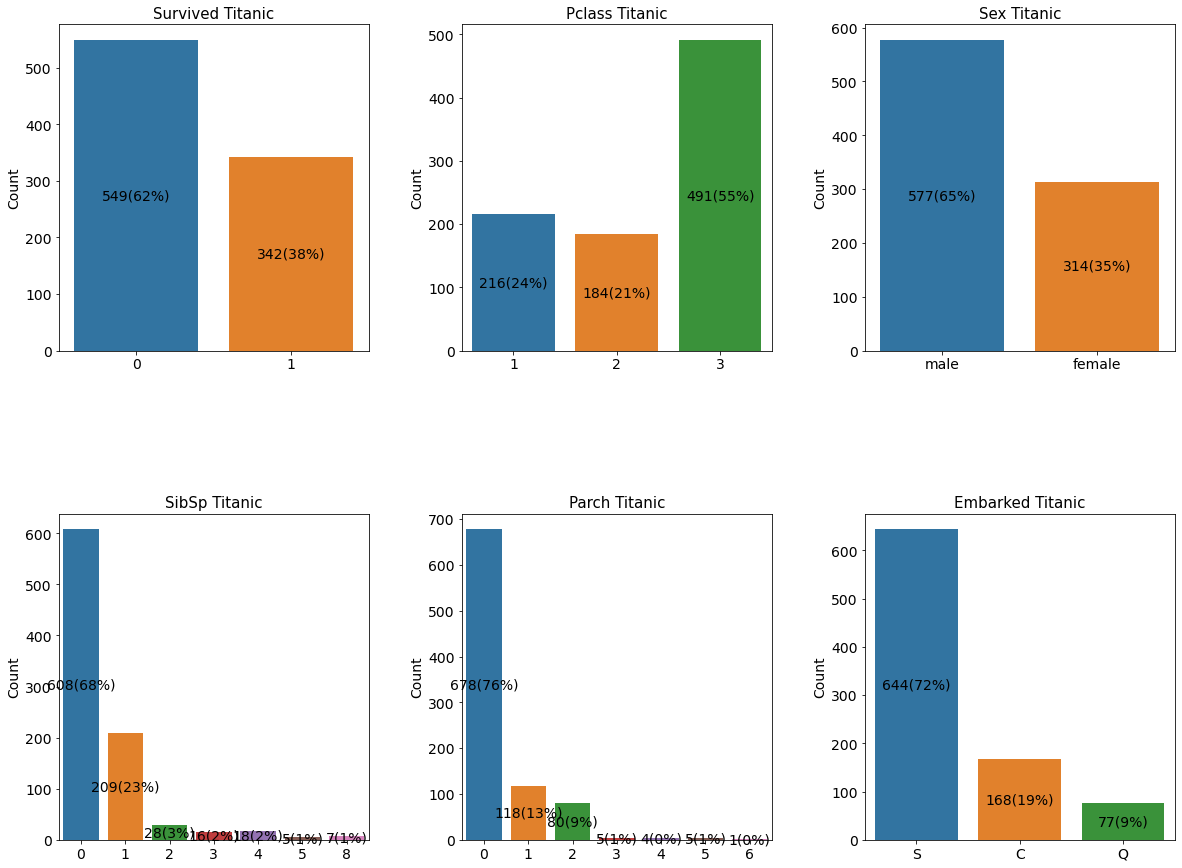

In [12]:
fig, myplot = plt.subplots(figsize = (20,15), nrows = 2,ncols = 3)

features = ['Survived', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']

row, col, num_cols = 0,0,3

for u in features:
    sns.barplot(x = df_train[u].value_counts().index,y = df_train[u].value_counts(),
                ax  = myplot[row, col])
    myplot[row, col].set_xlabel("")
    myplot[row, col].set_title(u + " Titanic", fontsize = 15)
    myplot[row, col].set_ylabel("Count")
    col = col + 1
    if col == 3:
        col = 0
        row = row + 1

plt.subplots_adjust(hspace = 0.5)
plt.subplots_adjust(wspace = 0.3)

for v in range(2):
    for z in range(3):
        for patch in myplot[v,z].patches:
            label_x = patch.get_x() + patch.get_width()/2  
            label_y = patch.get_y() + patch.get_height()/2
            myplot[v,z].text(label_x, label_y, 
                             str(int(patch.get_height())) + '('+'{:.0%}'.format(
                               patch.get_height()/len(df_train.Survived))+')',
                            horizontalalignment='center', verticalalignment='center')

### Survived

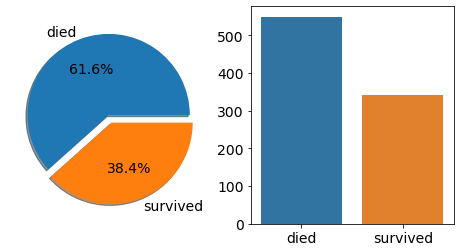

In [13]:
#график сравнение выживших и умерших 
f,ax=plt.subplots(1,2,figsize=(8,4))
df_train['Survived'].replace({0:"died",1:"survived"}).value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_ylabel('')
sns.countplot(x = df_train["Survived"].replace({0:"died",1:"survived"}) , ax = ax[1])
ax[1].set_ylabel('')
ax[1].set_xlabel('')
plt.show()

In [14]:
# графическое сравнение столбца с таргетом
def survived_bar_plot(feature):
    plt.figure(figsize = (6,4))
    sns.barplot(data = df_train , x = feature , y = "Survived").set_title(f"{feature} Vs Survived")
    plt.show()
def survived_table(feature):
    return df_train[[feature, "Survived"]].groupby([feature], as_index=False).mean().sort_values(by='Survived', ascending=False).style.background_gradient(low=0.75,high=1)
def survived_hist_plot(feature):
    plt.figure(figsize = (6,4))
    sns.histplot(data = df_train, x = feature , hue = "Survived",binwidth=5,palette = sns.color_palette(["yellow" , "green"]) ,multiple = "stack" ).set_title(f"{feature} Vs Survived")
    plt.show()

### Pclass

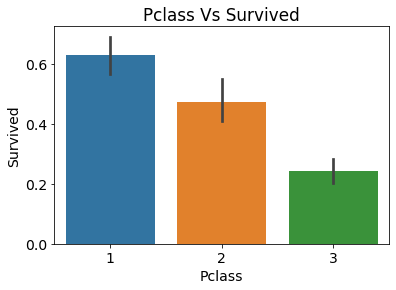

In [15]:
survived_bar_plot('Pclass')

In [17]:
df_train['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [18]:
df_train.groupby(['Pclass']) ['Survived'].value_counts(normalize=True)

Pclass  Survived
1       1           0.629630
        0           0.370370
2       0           0.527174
        1           0.472826
3       0           0.757637
        1           0.242363
Name: Survived, dtype: float64

Result: A large number of survivors in the 1st class.

### Sex

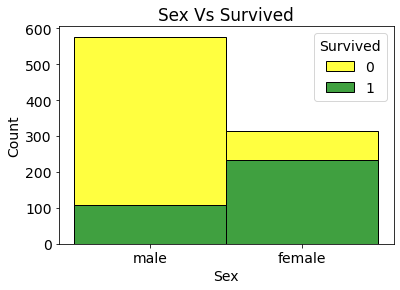

In [19]:
survived_hist_plot('Sex')

In [20]:
df_train.groupby(['Sex']) ['Survived'].value_counts(normalize=True)

Sex     Survived
female  1           0.742038
        0           0.257962
male    0           0.811092
        1           0.188908
Name: Survived, dtype: float64

In [21]:
survived_table('Sex')

,Sex,Survived
0,female,0.742038
1,male,0.188908


Result:  Females are more likely to survive.

### SibSp

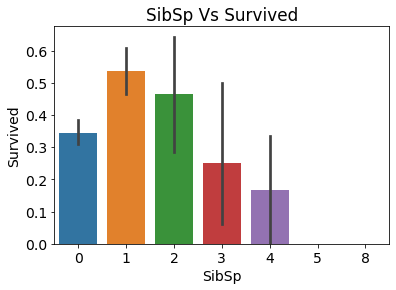

In [22]:
survived_bar_plot('SibSp')

In [23]:
df_train['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [24]:
df_train.groupby(['SibSp']) ['Survived'].value_counts(normalize=True)

SibSp  Survived
0      0           0.654605
       1           0.345395
1      1           0.535885
       0           0.464115
2      0           0.535714
       1           0.464286
3      0           0.750000
       1           0.250000
4      0           0.833333
       1           0.166667
5      0           1.000000
8      0           1.000000
Name: Survived, dtype: float64

Result: People traveling alone are more likely to survive.

### Parch

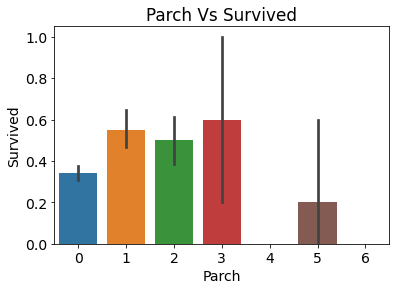

In [25]:
survived_bar_plot('Parch')

In [26]:
df_train['Parch'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [27]:
df_train.groupby(['Parch']) ['Survived'].value_counts(normalize=True)

Parch  Survived
0      0           0.656342
       1           0.343658
1      1           0.550847
       0           0.449153
2      0           0.500000
       1           0.500000
3      1           0.600000
       0           0.400000
4      0           1.000000
5      0           0.800000
       1           0.200000
6      0           1.000000
Name: Survived, dtype: float64

Result: People traveling with families of 1 to 3 people survived more

### Embarked

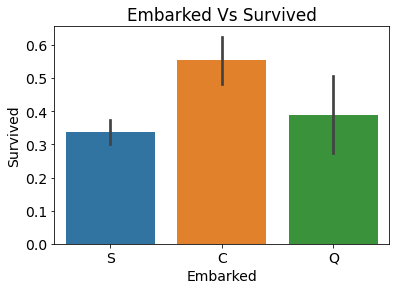

In [28]:
survived_bar_plot('Embarked')

In [29]:
df_train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [30]:
df_train.groupby(['Embarked']) ['Survived'].value_counts(normalize=True)

Embarked  Survived
C         1           0.553571
          0           0.446429
Q         0           0.610390
          1           0.389610
S         0           0.663043
          1           0.336957
Name: Survived, dtype: float64

Result: People who landed in the city of 'C' survived more

### Fare

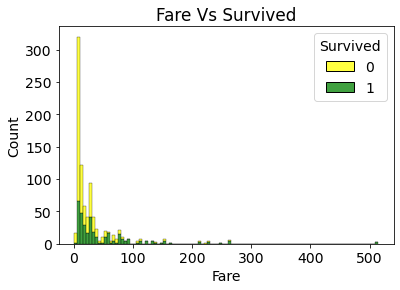

In [31]:
survived_hist_plot('Fare')

### Age

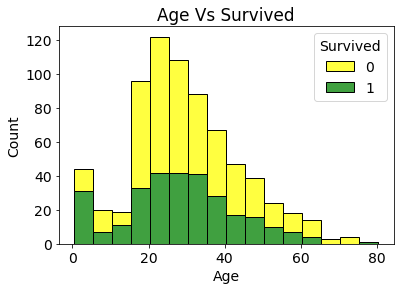

In [32]:
survived_hist_plot('Age')

<AxesSubplot:>

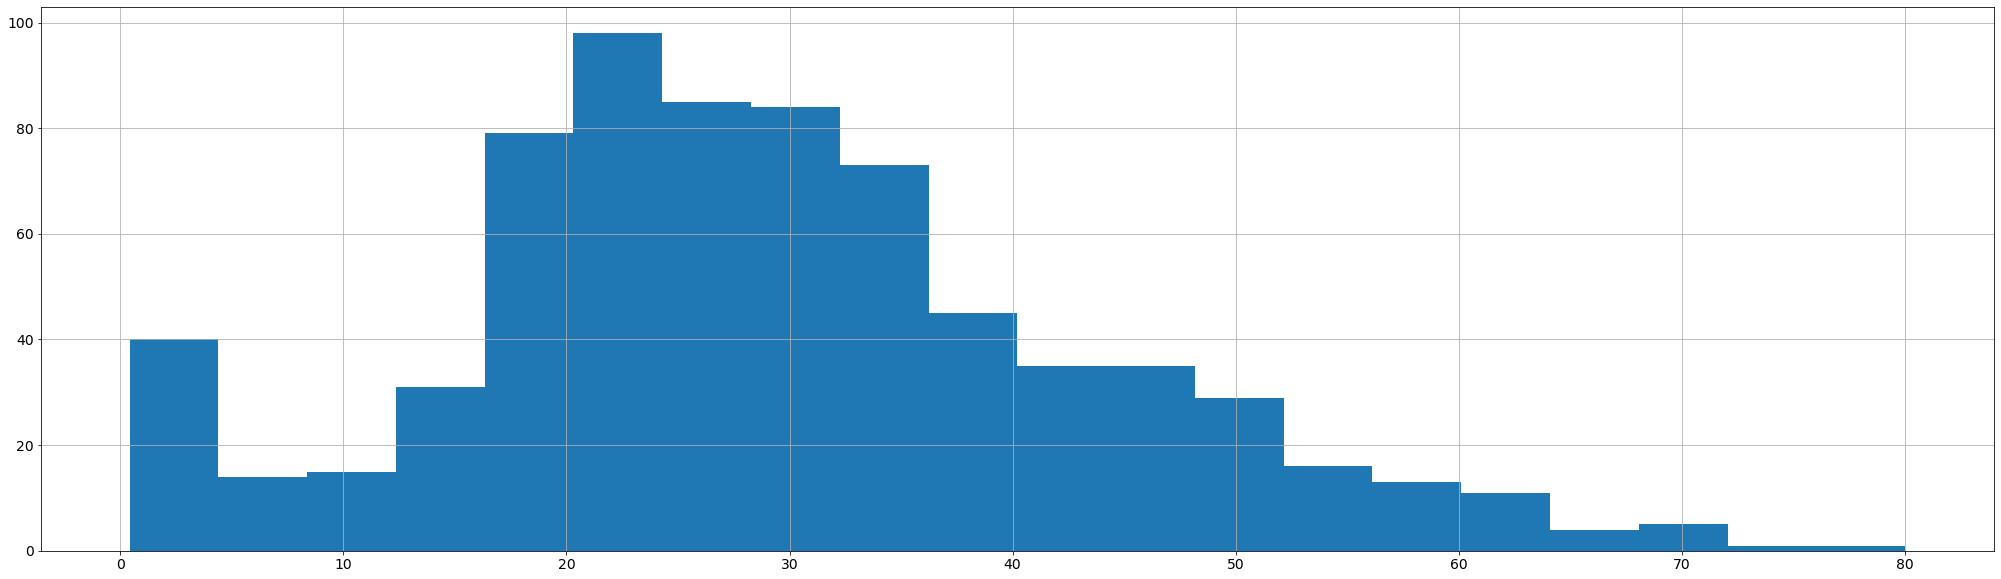

In [33]:
df_train['Age'].hist(bins=20)

<AxesSubplot:xlabel='Age', ylabel='count'>

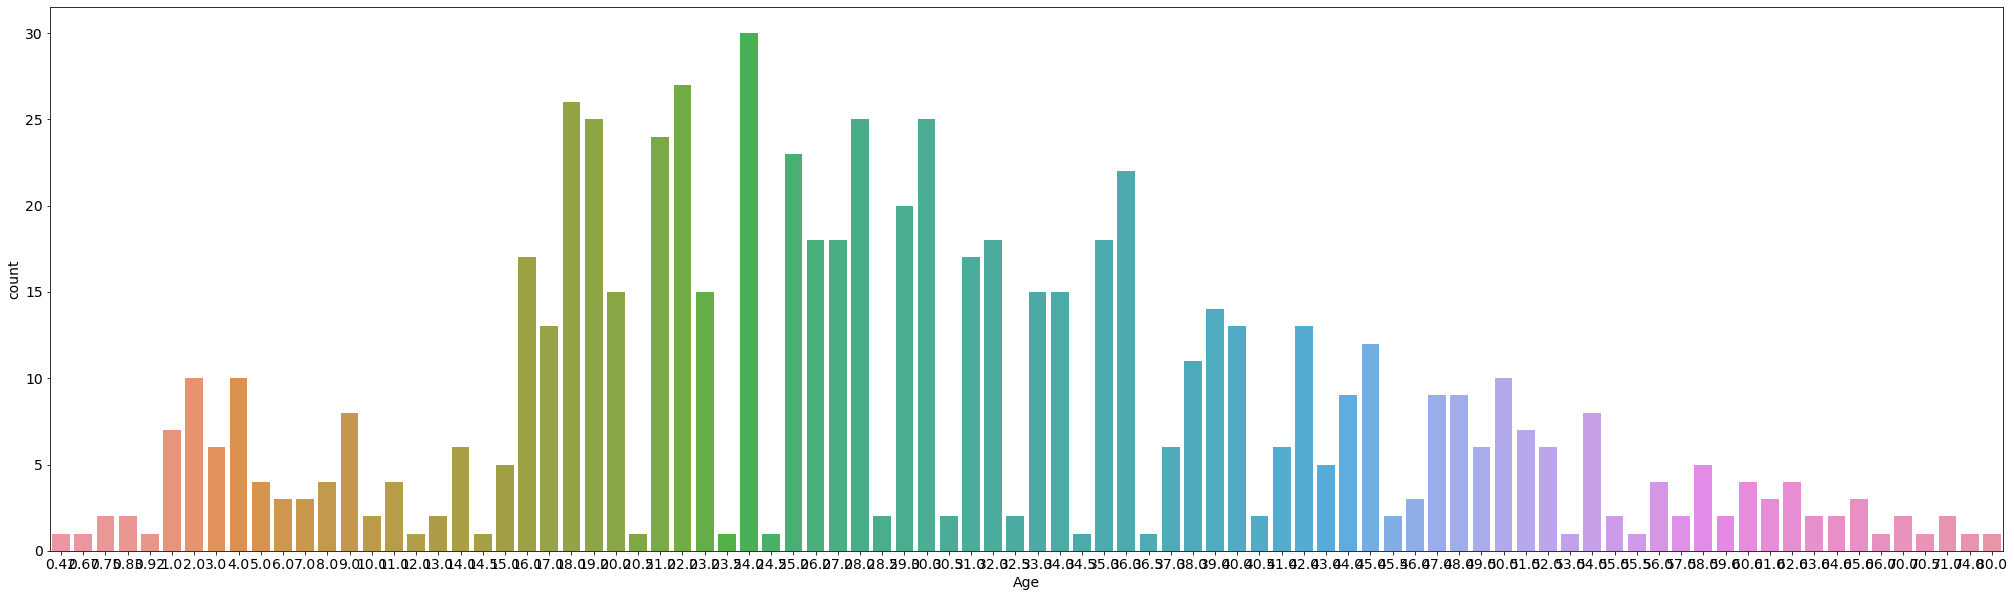

In [34]:
sns.countplot(x='Age', data=df_train)

Result: People aged 20 to 35 survived more

## 5. Cleaning Data

#### We are deleting the columns with the name, ticket number and cabin number, as these data will not be able to help us:

In [35]:
#удаляем ненужные столбцы
df_train = df_train.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)
df_test = df_test.drop(['Name', 'Ticket', 'Cabin'], axis=1)
df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


#### Replaces the missing values in columns 'Age', 'Fare' with the average value, and in column 'Embarked' with the 'S':

In [36]:
# заполняем недостающие значения средними
df_train['Age'].fillna(df_train['Age'].mean(), inplace = True)
df_test['Age'].fillna(df_test['Age'].mean(), inplace = True)
df_test['Fare'].fillna(df_test['Fare'].mean(), inplace = True)
df_train = df_train.fillna({'Embarked': 'S'})
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [37]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    object 
 3   Age          418 non-null    float64
 4   SibSp        418 non-null    int64  
 5   Parch        418 non-null    int64  
 6   Fare         418 non-null    float64
 7   Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 26.2+ KB


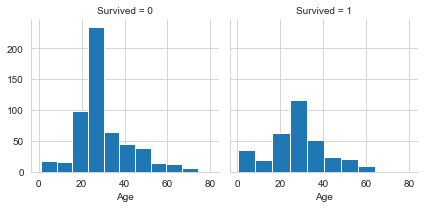

In [38]:
sns.set_style('whitegrid')
%matplotlib inline

g = sns.FacetGrid(df_train, col='Survived')
g.map(plt.hist, 'Age', bins=10)

#### Convert categorical variables to numeric ones:

In [39]:
#преобразуем в числовые значения
embarked_mapping = {"S": 1, "C": 2, "Q": 3}
df_train['Embarked'] = df_train['Embarked'].map(embarked_mapping)
df_test['Embarked'] = df_test['Embarked'].map(embarked_mapping)
df_train.sample(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
867,0,1,male,31.000000,0,0,50.4958,1
74,1,3,male,32.000000,0,0,56.4958,1
717,1,2,female,27.000000,0,0,10.5000,1
533,1,3,female,29.699118,0,2,22.3583,2
808,0,2,male,39.000000,0,0,13.0000,1


In [40]:
sex_mapping = {"male": 0, "female": 1}
df_train['Sex'] = df_train['Sex'].map(sex_mapping)
df_test['Sex'] = df_test['Sex'].map(sex_mapping)

df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,1
1,1,1,1,38.0,1,0,71.2833,2
2,1,3,1,26.0,0,0,7.9250,1
3,1,1,1,35.0,1,0,53.1000,1
4,0,3,0,35.0,0,0,8.0500,1


#### Corelation

<AxesSubplot:>

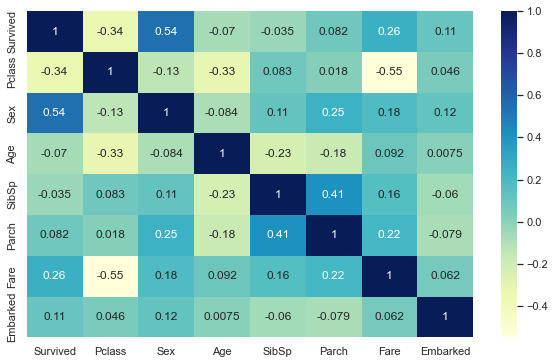

In [41]:
#график кореляции
sns.set(rc = {'figure.figsize':(10,6)})
sns.heatmap(df_train.corr(), annot = True, fmt='.2g',cmap= 'YlGnBu')

In [42]:
# корреляцию между функциями и нашей целью.
df_train.corr()["Survived"].sort_values(ascending=False)

Survived    1.000000
Sex         0.543351
Fare        0.257307
Embarked    0.106811
Parch       0.081629
SibSp      -0.035322
Age        -0.069809
Pclass     -0.338481
Name: Survived, dtype: float64

Result: the most correlated signs are 'Sex' and 'Pclass'

## 6. Splitting the Training Data

In [43]:
predictors = df_train.drop(['Survived'], axis=1)
target = df_train["Survived"]
x_train, x_val, y_train, y_val = train_test_split(predictors, target, test_size = 0.22, random_state = 0)

In [44]:
x_train.shape

(694, 7)

In [45]:
x_val.shape

(197, 7)

In [46]:
y_train.shape

(694,)

In [47]:
y_val.shape

(197,)

## 7. Testing Different Models

#### Let's choose the following models for training:
1. Gaussian Naive Bayes
2. Logistic Regression
3. Support Vector Machines
4. Decision Tree Classifier
5. Random Forest Classifier
6. KNN or k-Nearest Neighbors
7. Gradient Boosting Classifier

#### Gaussian Naive Bayes

In [51]:
#Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
#import sklearn.metrics

naive_bayes_model = GaussianNB()
naive_bayes_model.fit(x_train, y_train)
y_pred_gaussian = naive_bayes_model.predict(x_val)

y_pred_proba_gaussian = naive_bayes_model.predict_proba(x_val)[:, 1]

acc_gaussian = round(accuracy_score(y_pred_gaussian, y_val) * 100, 2)
precision_gaussian = round(sklearn.metrics.precision_score(y_val, y_pred_gaussian) * 100, 2)
recall_gaussian = round(sklearn.metrics.recall_score(y_val, y_pred_gaussian) * 100, 2)
#auc_gaussian = round(metrics.roc_auc_score(y_val, y_pred_gaussian) * 100, 2)

print(acc_gaussian)
print(precision_gaussian)
print(recall_gaussian)
#print(auc_gaussian)

79.7
70.89
76.71


#### Logistic Regression

In [ ]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

logreg_model = LogisticRegression()
logreg_model.fit(x_train, y_train)
y_pred_logreg = logreg_model.predict(x_val)

y_pred_proba_logreg = naive_bayes_model.predict_proba(x_val)[:, 1]

acc_logreg = round(accuracy_score(y_pred_logreg, y_val) * 100, 2)
precision_logreg = round(sklearn.metrics.precision_score(y_val, y_pred_logreg) * 100, 2)
recall_logreg = round(sklearn.metrics.recall_score(y_val, y_pred_logreg) * 100, 2)
auc_logreg = round(metrics.roc_auc_score(y_val, y_pred_logreg) * 100, 2)

print(acc_logreg)
print(precision_logreg)
print(recall_logreg)
print(auc_logreg)

#### Support Vector Machines

In [ ]:
# Support Vector Machines
from sklearn.svm import SVC

svc_model = SVC()
svc_model.fit(x_train, y_train)
y_pred_svc = svc_model.predict(x_val)

y_pred_proba_svc = naive_bayes_model.predict_proba(x_val)[:, 1]

acc_svc = round(accuracy_score(y_pred_svc, y_val) * 100, 2)
precision_svc = round(sklearn.metrics.precision_score(y_val, y_pred_svc) * 100, 2)
recall_svc = round(sklearn.metrics.recall_score(y_val, y_pred_svc) * 100, 2)
auc_svc = round(metrics.roc_auc_score(y_val, y_pred_svc) * 100, 2)

print(acc_svc)
print(precision_svc)
print(recall_svc)
print(auc_svc)

#### Decision Tree

In [ ]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier

decisiontree_model = DecisionTreeClassifier()
decisiontree_model.fit(x_train, y_train)
y_pred_decisiontree = decisiontree_model.predict(x_val)

y_pred_proba_decisiontree = naive_bayes_model.predict_proba(x_val)[:, 1]

acc_decisiontree = round(accuracy_score(y_pred_decisiontree, y_val) * 100, 2)
precision_decisiontree = round(sklearn.metrics.precision_score(y_val, y_pred_decisiontree) * 100, 2)
recall_decisiontree = round(sklearn.metrics.recall_score(y_val, y_pred_decisiontree) * 100, 2)
auc_decisiontree = round(metrics.roc_auc_score(y_val, y_pred_decisiontree) * 100, 2)

print(acc_decisiontree)
print(precision_decisiontree)
print(recall_decisiontree)
print(auc_decisiontree)

#### Random Forest

In [ ]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

randomforest_model = RandomForestClassifier()
randomforest_model.fit(x_train, y_train)
y_pred_randomforest = randomforest_model.predict(x_val)

y_pred_proba_randomforest = naive_bayes_model.predict_proba(x_val)[:, 1]

acc_randomforest = round(accuracy_score(y_pred_randomforest, y_val) * 100, 2)
precision_randomforest = round(sklearn.metrics.precision_score(y_val, y_pred_randomforest) * 100, 2)
recall_randomforest = round(sklearn.metrics.recall_score(y_val, y_pred_randomforest) * 100, 2)
auc_randomforest = round(metrics.roc_auc_score(y_val, y_pred_randomforest) * 100, 2)

print(acc_randomforest)
print(precision_randomforest)
print(recall_randomforest)
print(auc_randomforest)

#### KNN or k-Nearest Neighbors

In [ ]:
# KNN or k-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier()
knn_model.fit(x_train, y_train)
y_pred_knn = knn_model.predict(x_val)

y_pred_proba_knn = naive_bayes_model.predict_proba(x_val)[:, 1]

acc_knn = round(accuracy_score(y_pred_knn, y_val) * 100, 2)
precision_knn = round(sklearn.metrics.precision_score(y_val, y_pred_knn) * 100, 2)
recall_knn = round(sklearn.metrics.recall_score(y_val, y_pred_knn) * 100, 2)
auc_knn = round(metrics.roc_auc_score(y_val, y_pred_knn) * 100, 2)

print(acc_knn)
print(precision_knn)
print(recall_knn)
print(auc_knn)

#### Gradient Boosting Classifier

In [ ]:
# Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier

gbk_model = GradientBoostingClassifier()
gbk_model.fit(x_train, y_train)
y_pred_gbk = gbk_model.predict(x_val)

y_pred_proba_gbk = naive_bayes_model.predict_proba(x_val)[:, 1]

acc_gbk = round(accuracy_score(y_pred_gbk, y_val) * 100, 2)
precision_gbk = round(sklearn.metrics.precision_score(y_val, y_pred_gbk) * 100, 2)
recall_gbk = round(sklearn.metrics.recall_score(y_val, y_pred_gbk) * 100, 2)
auc_gbk = round(metrics.roc_auc_score(y_val, y_pred_gbk) * 100, 2)

print(acc_gbk)
print(precision_gbk)
print(recall_gbk)
print(auc_gbk)

In [ ]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Decision Tree', 'Gradient Boosting Classifier'],
    'Score': [acc_knn, acc_logreg, acc_randomforest, acc_gaussian, acc_svc, acc_decisiontree, acc_gbk]})
models.sort_values(by='Score', ascending=False)

Result: Gradient Boosting Classifier showed the best result

## 8. Creating Submission File

In [ ]:
# идентификаторы пассажиров и прогноз
ids = df_test['PassengerId']
predictions = gbk_model.predict(df_test.drop('PassengerId', axis=1))
predictions.shape

In [ ]:
# выходные данные 
output = pd.DataFrame({ 'PassengerId' : ids, 'Survived': predictions })
output.to_csv('submission_titanic.csv', index=False)